In [1]:
%load_ext autoreload
%autoreload 2



In [2]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)



In [3]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import pandas as pd
import sbrt_ibict_ml.sbrt_ibict_ml as sbrt
import matplotlib.pyplot as plt



In [4]:
dossies = sbrt.data.get_dossies_df(size=50)
corpus = dossies.text

dossies.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   file    50 non-null     object
 1   text    50 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [5]:
vectorizer = TfidfVectorizer(stop_words=stopwords.words('portuguese'))
X = vectorizer.fit_transform(corpus)
X.shape



(50, 28229)

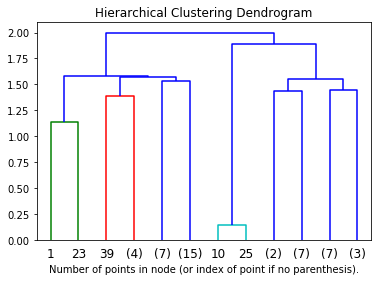

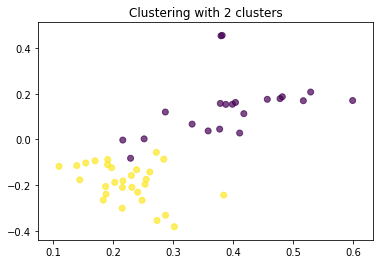

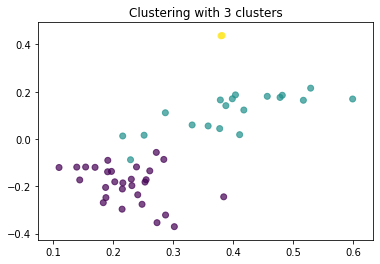

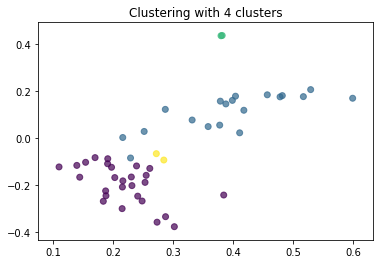

In [8]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X.toarray())
# plot the top three levels of the dendrogram
sbrt.plot_dendrogram(model, truncate_mode='level', p=3)

sbrt.plot_SVD_clusters(model, X, 5)



In [7]:
model.labels_

array([1, 3, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 3, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1])